In [1]:
from pathlib import Path
import pandas as pd

In [2]:
HERE = Path.cwd().parent.parent
DATASET_PATH = HERE / 'dataset'

In [3]:
import sys
sys.path.append(str(HERE))

In [4]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import pandas as pd
from piu.data.data_preprocessor import DataPreprocessor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 🔥 Charger les données de test
df = pd.read_csv(f"{TEST_DATA_PATH}")

# Vérifier si la colonne ID est présente
ids = df['id'] if 'id' in df.columns else None
df = df.drop(columns=['id'], errors='ignore')  # Supprimer la colonne ID si elle existe
# 🔥 Charger le préprocesseur
preprocessor = joblib.load(f"{CHECKPOINT_DIR}/preprocessor.pkl")
# ✅ Aligner les colonnes avant transformation
df_aligned = align_columns(df, preprocessor)
# ✅ Appliquer la transformation avec le pipeline déjà entraîné
X = preprocessor.pipeline.transform(df_aligned)
# ✅ Appliquer la sélection de features (si elle a été faite à l'entraînement)
if preprocessor.selector:
    X = preprocessor.selector.transform(X)
if preprocessor.selected_features_ is not None:
    X = X[:, preprocessor.selected_features_]

✅ Colonnes communes utilisées : ['PAQ_A-PAQ_A_Total', 'SDS-SDS_Total_Raw', 'FGC-FGC_CU', 'Physical-Diastolic_BP', 'BIA-BIA_Fat', 'Physical-Season', 'BIA-BIA_Activity_Level_num', 'PreInt_EduHx-computerinternet_hoursday', 'FGC-FGC_GSD_Zone', 'BIA-BIA_FFMI', 'Basic_Demos-Enroll_Season', 'Physical-Height', 'Fitness_Endurance-Time_Mins', 'Physical-Weight', 'FGC-Season', 'BIA-BIA_BMR', 'FGC-FGC_SRL', 'id', 'FGC-FGC_CU_Zone', 'BIA-BIA_LDM', 'Fitness_Endurance-Max_Stage', 'Physical-Systolic_BP', 'BIA-BIA_LST', 'FGC-FGC_PU', 'PAQ_C-Season', 'Physical-HeartRate', 'Fitness_Endurance-Time_Sec', 'PreInt_EduHx-Season', 'BIA-BIA_DEE', 'Physical-Waist_Circumference', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'BIA-BIA_FFM', 'Physical-BMI', 'Fitness_Endurance-Season', 'FGC-FGC_SRR_Zone', 'BIA-BIA_ECW', 'PAQ_A-Season', 'CGAS-CGAS_Score', 'FGC-FGC_SRR', 'SDS-SDS_Total_T', 'BIA-BIA_TBW', 'FGC-FGC_GSD', 'FGC-FGC_PU_Zone', 'FGC-FGC_TL', 'BIA-BIA_Frame_num', 'CGAS-Season', 'FGC-FGC_GSND_Zone', 'BIA-BIA_ICW', 'SDS

In [7]:
clf = TabNetClassifier()  #TabNetRegressor()
clf.fit(
  X_train, 
  y_train,
  eval_set=[(X_test, y_test)],
  weights=1
)

/home/goamegah/Documents/workspace/venv/deepl-piu/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.70115 | val_0_accuracy: 0.26095 |  0:00:00s
epoch 1  | loss: 1.49816 | val_0_accuracy: 0.19343 |  0:00:00s
epoch 2  | loss: 1.41597 | val_0_accuracy: 0.14234 |  0:00:00s
epoch 3  | loss: 1.34536 | val_0_accuracy: 0.17701 |  0:00:00s
epoch 4  | loss: 1.28973 | val_0_accuracy: 0.19526 |  0:00:00s
epoch 5  | loss: 1.26475 | val_0_accuracy: 0.18613 |  0:00:00s
epoch 6  | loss: 1.23497 | val_0_accuracy: 0.21898 |  0:00:01s
epoch 7  | loss: 1.19537 | val_0_accuracy: 0.24453 |  0:00:01s
epoch 8  | loss: 1.1595  | val_0_accuracy: 0.23905 |  0:00:01s
epoch 9  | loss: 1.1342  | val_0_accuracy: 0.25    |  0:00:01s
epoch 10 | loss: 1.13783 | val_0_accuracy: 0.27555 |  0:00:01s
epoch 11 | loss: 1.12437 | val_0_accuracy: 0.30292 |  0:00:01s
epoch 12 | loss: 1.14645 | val_0_accuracy: 0.28467 |  0:00:01s
epoch 13 | loss: 1.10404 | val_0_accuracy: 0.2719  |  0:00:01s
epoch 14 | loss: 1.08803 | val_0_accuracy: 0.23905 |  0:00:02s
epoch 15 | loss: 1.11827 | val_0_accuracy: 0.23723 |  0

/home/goamegah/Documents/workspace/venv/deepl-piu/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


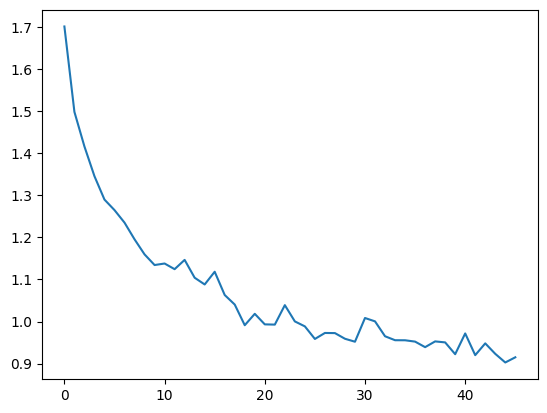

In [8]:
# plot losses
plt.plot(clf.history['loss'])

In [9]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

KeyError: 'train_accuracy'

In [ ]:
preds = clf.predict(X_test)
print(preds)